## A2.1 Text Processing & Zipf’s Law 

### **Step 1.** To access the full Brown corpus, import it from NLTK 
Task: *Compute a list of unique words sorted by descending frequency for (i) the whole corpus and (ii) two different genres of your choice.*

In [16]:
#libraries:
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import brown
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [2]:
#downloads (do only once :))
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package brown to /Users/jago/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jago/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jago/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
#flat list of all words tokens (including punctuations)
words = brown.words()
fwords = FreqDist(words)

#unique words tokens & their frequencies: 
#(i) for whole corpus
print(fwords.most_common(100))

[('the', 62713), (',', 58334), ('.', 49346), ('of', 36080), ('and', 27915), ('to', 25732), ('a', 21881), ('in', 19536), ('that', 10237), ('is', 10011), ('was', 9777), ('for', 8841), ('``', 8837), ("''", 8789), ('The', 7258), ('with', 7012), ('it', 6723), ('as', 6706), ('he', 6566), ('his', 6466), ('on', 6395), ('be', 6344), (';', 5566), ('I', 5161), ('by', 5103), ('had', 5102), ('at', 4963), ('?', 4693), ('not', 4423), ('are', 4333), ('from', 4207), ('or', 4118), ('this', 3966), ('have', 3892), ('an', 3542), ('which', 3540), ('--', 3432), ('were', 3279), ('but', 3007), ('He', 2982), ('her', 2885), ('one', 2873), ('they', 2773), ('you', 2766), ('all', 2726), ('would', 2677), ('him', 2576), ('their', 2562), ('been', 2470), (')', 2466), ('(', 2435), ('has', 2425), ('will', 2204), ('who', 2192), ('more', 2130), ('out', 2058), ('It', 2037), ('we', 1973), ('she', 1949), ('said', 1943), ('there', 1877), ('up', 1874), ('In', 1801), (':', 1795), ('than', 1788), ('them', 1786), ('into', 1782), (

For the next part of the assignment we can choose any category from the brown corpus from the following:  
- 'adventure',
- 'belles_lettres',
- 'editorial',
- 'fiction',
- 'government',
- **'hobbies'**,
- 'humor',
- 'learned',
- 'lore',
- 'mystery',
- **'news'**,
- 'religion',
- 'reviews',
- 'romance',
- 'science_fiction'

In [5]:
#unique words tokens & their frequencies:
#(ii) for two different genres of your choice.
words_news = brown.words(categories='news')
words_hobbies = brown.words(categories='hobbies')
fwords_news = FreqDist(words_news)
fwords_hobbies = FreqDist(words_hobbies)
print("The 100 most common news words:",fwords_news.most_common(100))
print("The 100 most common hobbies words:",fwords_hobbies.most_common(100))

The 100 most common news words: [('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806), ('that', 802), ('``', 732), ('is', 732), ('was', 717), ("''", 702), ('on', 657), ('at', 598), ('with', 545), ('be', 526), ('by', 497), ('as', 481), ('he', 451), ('said', 402), ('his', 399), ('will', 389), ('it', 363), ('from', 344), ('are', 328), (';', 314), ('an', 300), ('has', 300), ('--', 300), ('had', 279), ('who', 268), ('have', 265), ('not', 254), ('Mrs.', 253), ('were', 252), ('this', 250), ('which', 244), ('would', 244), ('their', 219), ('been', 212), ('they', 205), ('He', 191), ('one', 184), ('I', 179), ('but', 174), ('its', 174), ('or', 173), (')', 171), ('more', 171), ('Mr.', 170), ('(', 168), ('up', 168), ('all', 163), ('out', 161), ('last', 161), ('two', 157), ('other', 149), (':', 149), ('new', 148), ('first', 143), ('than', 138), ('year', 138), ('A', 137), ('about', 136), ('there', 131), ('when', 128),

### **Step 2.** Extract the following information for each portion (corpus + each genre): 
Task: *This process and informations should be visible in your code and output files:  
(i) number of tokens;  
(ii) number of types;  
(iii) number of words;  
(iv) average number of words per sentence;  
(v) average word length;  
(vi) number of lemmas.*

In [6]:
#count all tokens
print(f"Number of ALL tokens in the main corpus {len(words)}\nNumber of ALL tokens in the news corpus {len(words_news)}\nNumber of ALL tokens in the hobbies corpus {len(words_hobbies)}")

Number of ALL tokens in the main corpus 1161192
Number of ALL tokens in the news corpus 100554
Number of ALL tokens in the hobbies corpus 82345


In [10]:
#here we assume that type is the same as UNIQUE tokens
corpus_types = len(fwords)
news_types = len(fwords_news)
hobbies_types = len(fwords_hobbies)
print(f"Number of types (UNIQUE tokens) in the main corpus {corpus_types}\nNumber of types (UNIQUE tokens) in the news corpus {news_types}\nNumber of types (UNIQUE tokens) in the hobbies corpus {hobbies_types}")

Number of types (UNIQUE tokens) in the main corpus 56057
Number of types (UNIQUE tokens) in the news corpus 14394
Number of types (UNIQUE tokens) in the hobbies corpus 11935


In [11]:
#we count all the types that are alpha == no punctuation
corpus_words = len(set(word.lower() for word in words if word.isalpha()))
news_words = len(set(word.lower() for word in words_news if word.isalpha()))
hobbies_words = len(set(word.lower() for word in words_hobbies if word.isalpha()))
print(f"Number of UNIQUE words in the main corpus {corpus_words}\nNumber of UNIQUE words in the news corpus {news_words}\nNumber of UNIQUE words in the hobbies corpus {hobbies_words}")

Number of UNIQUE words in the main corpus 40234
Number of UNIQUE words in the news corpus 11151
Number of UNIQUE words in the hobbies corpus 9373


In [12]:
#function that computes average number of words per sentence in ENTIRE CORPUS
def av_words_all():
    text = ' '.join(brown.words()) #join all tokens into one string with " " 
    sentence_tokenizer = PunktSentenceTokenizer() #create a tokenizer for sentences based on punctuation
    sentences = sentence_tokenizer.tokenize(text) #tokenize the joint text
    sentence_word_lists = [word_tokenize(sent) for sent in sentences] #tokenize the words from sentences
    average_length = sum(len(s) for s in sentence_word_lists) / len(sentence_word_lists) #compute the average sentence length
    return average_length

#function that computes average number of words per sentence in SELECTED CATEGORY OF CORPUS
#each steps same as above but we choose 1 category of corpus
def av_words(category):
    text = ' '.join(brown.words(categories=category))
    sentence_tokenizer = PunktSentenceTokenizer()
    sentences = sentence_tokenizer.tokenize(text)
    sentence_word_lists = [word_tokenize(sent) for sent in sentences]
    average_length = sum(len(s) for s in sentence_word_lists) / len(sentence_word_lists)
    return average_length

print(f"Average sentence length in main corpus: {av_words_all():.2f}")
print(f"Average sentence length in news category: {av_words('news'):.2f}")
print(f"Average sentence length in hobbies category: {av_words('hobbies'):.2f}")

Average sentence length in main corpus: 19.84
Average sentence length in news category: 19.69
Average sentence length in hobbies category: 20.26


In [13]:
#compute the average lengths of words for each category
av_word = sum(len(s) for s in words) / len(words)
av_word_news = sum(len(s) for s in words_news) / len(words_news)
av_word_hobbies = sum(len(s) for s in words_hobbies) / len(words_hobbies)

print(f"Average word length in main corpus: {av_word:.2f}")
print(f"Average word length in news category: {av_word_news:.2f}")
print(f"Average word length in hobbies category: {av_word_hobbies:.2f}")

Average word length in main corpus: 4.28
Average word length in news category: 4.40
Average word length in hobbies category: 4.36


In [18]:
#function that returns correst POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#create POS tags for each category
tagged_main = pos_tag([w.lower() for w in words if w.isalpha()])
tagged_news = pos_tag([w.lower() for w in words_news if w.isalpha()])
tagged_hobbies = pos_tag([w.lower() for w in words_hobbies if w.isalpha()])

#lemmatize with given tags
main_lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in tagged_main]
news_lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in tagged_news]
hobbies_lemmas = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in tagged_hobbies]

print(f"Number of UNIQUE lemmas in main corpus: {len(set(main_lemmas))}")
print(f"Number of UNIQUE lemmas in news corpus: {len(set(news_lemmas))}")
print(f"Number of UNIQUE lemmas in hobbies corpus: {len(set(hobbies_lemmas))}")

Number of UNIQUE lemmas in main corpus: 32168
Number of UNIQUE lemmas in news corpus: 8911
Number of UNIQUE lemmas in hobbies corpus: 7266


### **Step 3.** Run a default part-of-speech (POS) tagger on the dataset.
Task: *Identify the ten most frequent POS tags.*

In [20]:
#get all tagged words
brown_tagged = brown.tagged_words(tagset='universal')
#compute frequency distribution for all tags
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_tagged)
#show the 10 most frequent
tag_fd.most_common(10)

[('NOUN', 275558),
 ('VERB', 182750),
 ('.', 147565),
 ('ADP', 144766),
 ('DET', 137019),
 ('ADJ', 83721),
 ('ADV', 56239),
 ('PRON', 49334),
 ('CONJ', 38151),
 ('PRT', 29829)]

### **Step 4.** Use the Python library matplotlib. 
Task: *Plot the frequency curves for the corpus and two genres you choose: i.e. x-axis is position in the frequency list, y-axis is frequency. Provide both a plot with linear axes and one with log-log axes.*

Before providing the frequency-rank plots, we would like to check what are the 40 most frequent words, with their corresponding frequencies, for each of the cathegories:

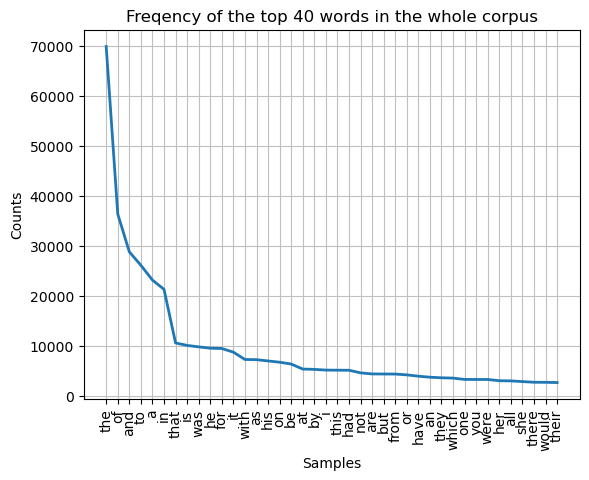

<Axes: title={'center': 'Freqency of the top 40 words in the whole corpus'}, xlabel='Samples', ylabel='Counts'>

In [29]:
#compute frequency distribution of words
fwords = FreqDist(word.lower() for word in words if word.isalpha())
#plot their 
fwords.plot(40, title='Freqency of the top 40 words in the whole corpus', cumulative=False, percents=False, show=True)

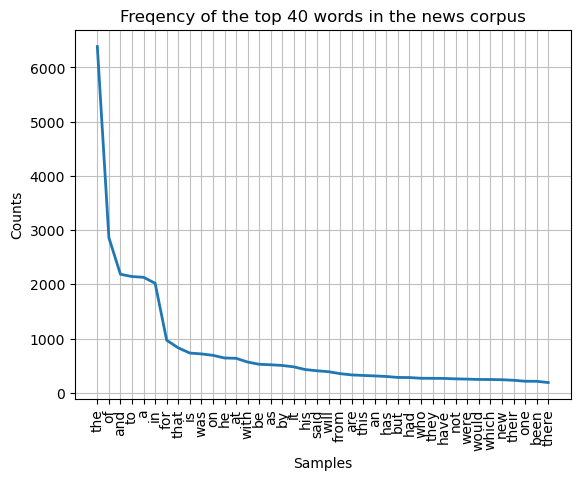

<Axes: title={'center': 'Freqency of the top 40 words in the news corpus'}, xlabel='Samples', ylabel='Counts'>

In [30]:
fwords_news = FreqDist(word.lower() for word in words_news if word.isalpha())
fwords_news.plot(40, title='Freqency of the top 40 words in the news corpus', cumulative=False, percents=False, show=True)

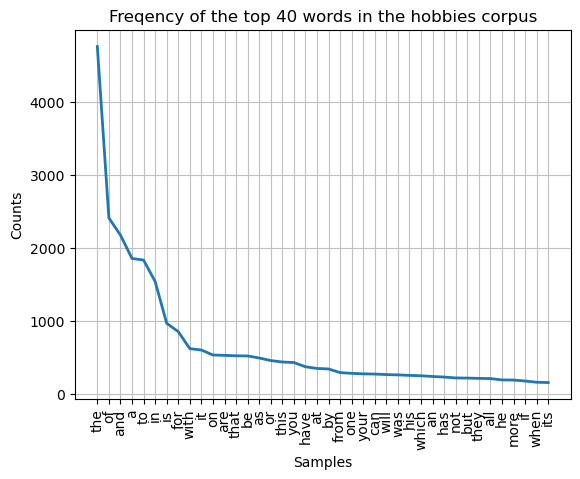

<Axes: title={'center': 'Freqency of the top 40 words in the hobbies corpus'}, xlabel='Samples', ylabel='Counts'>

In [31]:
fwords_hobbies = FreqDist(word.lower() for word in words_hobbies if word.isalpha())
fwords_hobbies.plot(40, title='Freqency of the top 40 words in the hobbies corpus', cumulative=False, percents=False, show=True)

We can observe that those top 40 words do not differ too much throughout the categories. No we will produce the frequency-rank graphs:

In [26]:
#get frequencies for the y-axis
freqs_corpus = sorted(list(fwords.values()), reverse=True)
freqs_news = sorted(list(fwords_news.values()), reverse=True)
freqs_hobbies = sorted(list(fwords_hobbies.values()), reverse=True)

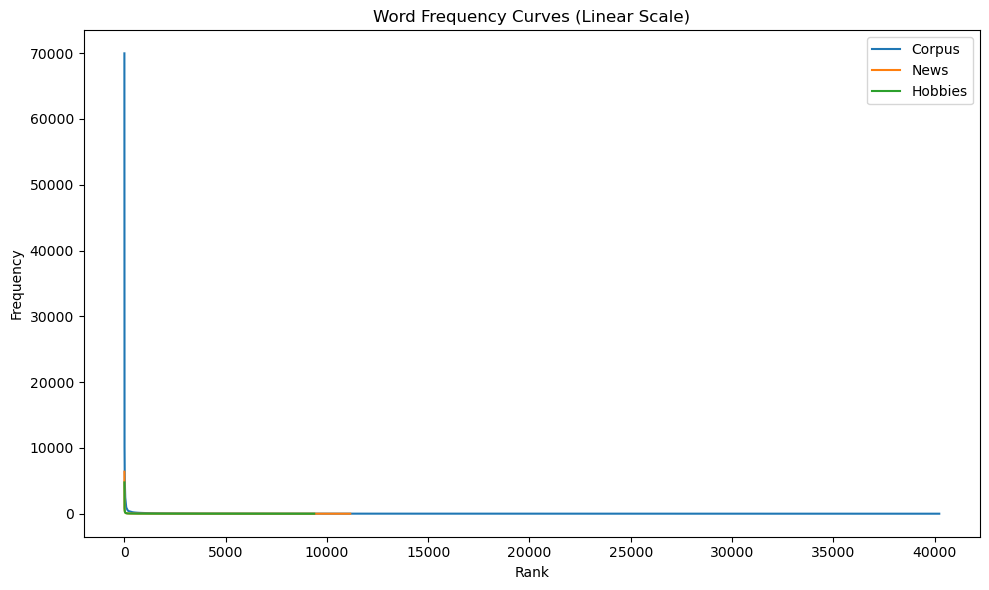

In [32]:
#plot the frequencies, where x-axis is the rank of the word and y-axis is the frequency
#linear scale
plt.figure(figsize=(10, 6))
plt.plot(freqs_corpus, label='Corpus')
plt.plot(freqs_news, label='News')
plt.plot(freqs_hobbies, label='Hobbies')
plt.title('Word Frequency Curves (Linear Scale)')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

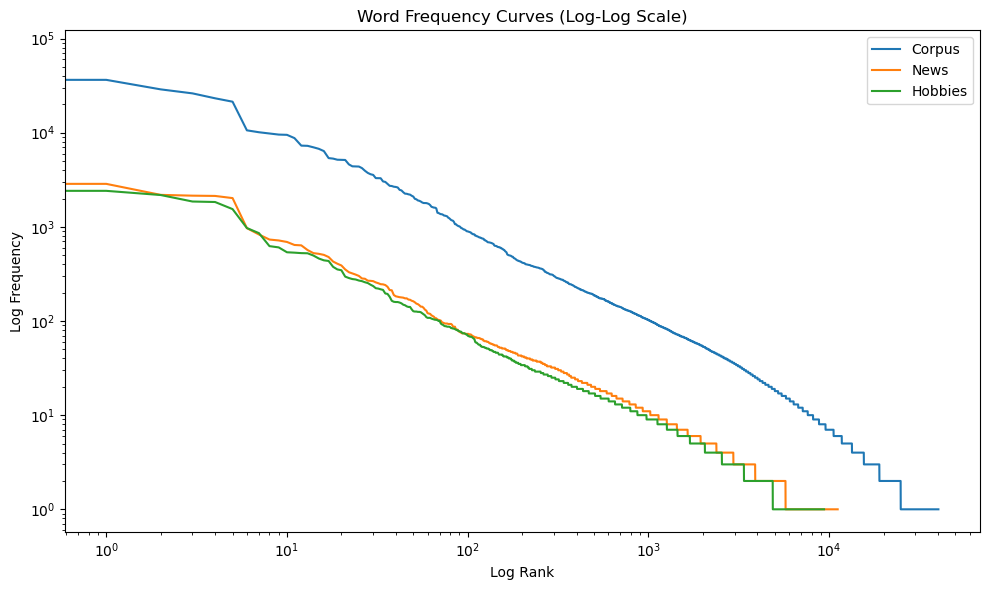

In [33]:
#plot the frequencies, where x-axis is the rank of the word and y-axis is the frequency
#logarithmic scale
plt.figure(figsize=(10, 6))
plt.loglog(freqs_corpus, label='Corpus')
plt.loglog(freqs_news, label='News')
plt.loglog(freqs_hobbies, label='Hobbies')
plt.title('Word Frequency Curves (Log-Log Scale)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.legend()
plt.tight_layout()
plt.show()

We can observe that corpus has more diversed words than its separate categories (no surprises), we can also notice that news has relatively more unique words than hobbies, which allign with our previous results from the counts.  
For greater analysis, please check the pdf file.

Sources used in this code:  
https://www.nltk.org/book/ch01.html  
https://www.nltk.org/book/ch02.html  
https://www.nltk.org/book/ch05.html   
https://www.geeksforgeeks.org/accessing-text-corpora-and-lexical-resources-using-nltk/  
https://www.geeksforgeeks.org/python-lemmatization-with-nltk/